In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

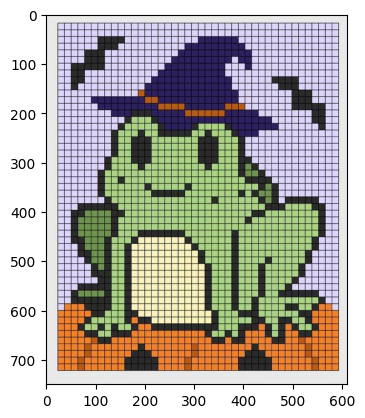

In [ ]:
img_bgr = cv2.imread('xyz.jpeg')
plt.imshow(img_bgr)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

0 255


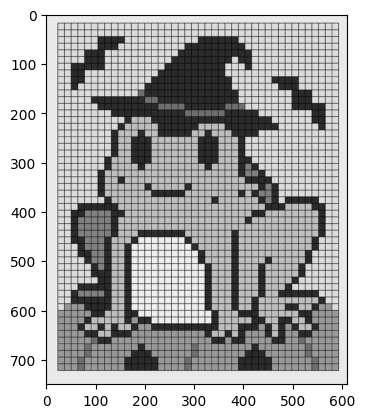

In [ ]:
grey_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(grey_img, cmap='gray')
print(grey_img.min(), grey_img.max())

In [ ]:
img = np.zeros(grey_img.shape, dtype="float")

In [ ]:
for x in range(1, grey_img.shape[0]):
  for y in range(1, grey_img.shape[1]):
    img[x, y] = grey_img[x, y] * np.power(-1, x + y)

In [ ]:
F = np.fft.fft2(img)
F

array([[-760.           +0.j        ,  226.6399212  +106.33196774j,
        -978.27779183 +927.57988276j, ...,  278.42261554 +857.3619977j ,
        -978.27779183 -927.57988276j,  226.6399212  -106.33196774j],
       [-617.85057743 +313.39824891j, -152.38507536 +521.5672539j ,
         -74.78481163 -678.26268681j, ..., -191.52867775 +196.58094218j,
        -315.17885405 +844.07892675j,  705.08078727 -728.57109016j],
       [ 927.22771673+1012.53254081j,  435.18585863 -294.18857512j,
         746.13611557 +919.87170139j, ...,  613.94494405 -741.0622009j ,
          95.85734664 -274.5886613j , 1133.49752154 +220.87114584j],
       ...,
       [ 276.13829459-1297.18776862j, -893.32090235 +187.81475678j,
        1474.99601472+1613.69993704j, ..., 1743.35216453 -703.42749928j,
        -118.73207051 +579.0345199j , 2091.21701366 +599.10212505j],
       [ 927.22771673-1012.53254081j, 1133.49752154 -220.87114584j,
          95.85734664 +274.5886613j , ..., 1304.24634567 -299.66170196j,
       

In [ ]:
M = img.shape[0]
N = img.shape[1]

In [ ]:
img.shape

(750, 610)

IDEAL LPF

In [ ]:
D = np.zeros(img.shape, dtype="float")
H_ideal = np.zeros(img.shape, dtype="float")
D0 = 150

In [ ]:
for u in range(1, M):
  for v in range(1, N):
    D[u, v] = np.power((np.power((u - M/2), 2) + np.power((v - N/2), 2)), 0.5)
    if D[u, v] <= D0:
      H_ideal[u, v] = 1
    else:
      H_ideal[u, v] = 0

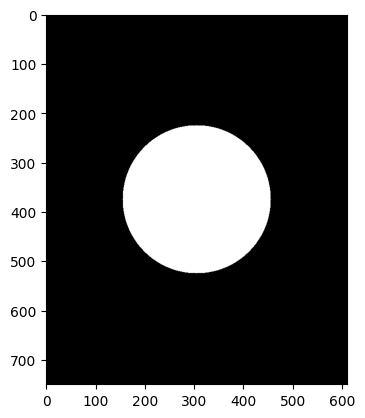

In [ ]:
plt.imshow(H_ideal, cmap='gray')

In [ ]:
G_ideal = np.zeros(img.shape, dtype="float")

In [ ]:
for u in range(1, M):
  for v in range(1, N):
    G_ideal[u, v] = F[u, v] * H_ideal[u, v]

/tmp/ipython-input-2667153655.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  G_ideal[u, v] = F[u, v] * H_ideal[u, v]


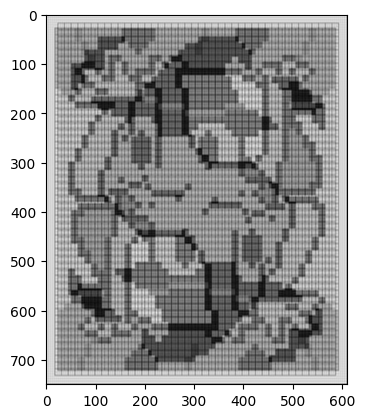

In [ ]:

G_ideal = np.fft.ifftshift(G_ideal)
G_ideal = np.fft.ifft2(G_ideal)
G_ideal = np.abs(G_ideal)
plt.imshow(G_ideal, cmap='gray')

GAUSSIAN LPF

In [ ]:
D = np.zeros(img.shape, dtype="float")
H_gaussian = np.zeros(img.shape, dtype="float")

D0 = 70
D0

70

In [ ]:
import math

In [ ]:
for u in range(1, M):
  for v in range(1, N):
    D[u, v] = np.power((np.power((u - M/2), 2) + np.power((v - N/2), 2)), 0.5)
    H_gaussian[u, v] = np.power(math.e, -(np.power(D[u, v], 2) / (2 * np.power(D0, 2))))

In [ ]:
print(H_gaussian.max())

1.0


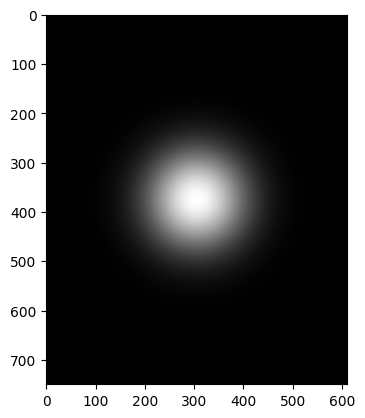

In [ ]:
plt.imshow(H_gaussian, cmap='gray')

In [ ]:
G_gaussian = np.zeros(img.shape, dtype="float")

In [ ]:
for u in range(1, M):
  for v in range(1, N):
    G_gaussian[u, v] = F[u, v] * H_gaussian[u, v]

/tmp/ipython-input-3679185501.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  G_gaussian[u, v] = F[u, v] * H_gaussian[u, v]


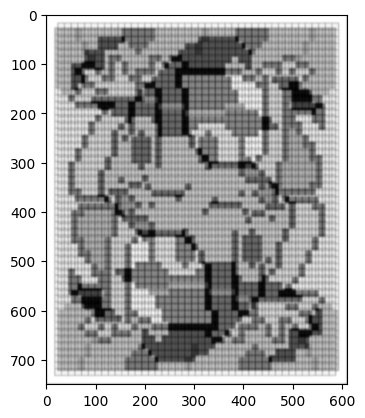

In [ ]:
G_gaussian = np.fft.ifftshift(G_gaussian)
G_gaussian = np.fft.ifft2(G_gaussian)
G_gaussian = np.abs(G_gaussian)
plt.imshow(G_gaussian, cmap='gray')

BUTTERWORTH LPF

In [ ]:
D = np.zeros(img.shape, dtype="float")
H_butter = np.zeros(img.shape, dtype="float")

D0 = 70
D0

70

In [ ]:
for u in range(1, M):
  for v in range(1, N):
    D[u, v] = np.power((np.power((u - M/2), 2) + np.power((v - N/2), 2)), 0.5)
    H_butter[u, v] = 1/(1 + np.power((D[u, v] / D0), 2))

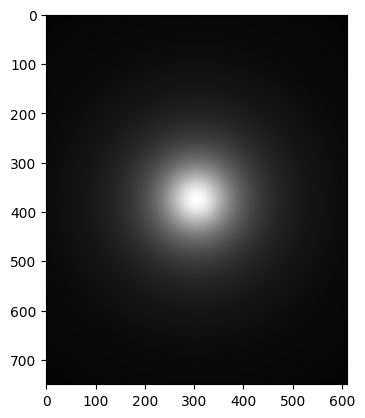

In [ ]:
plt.imshow(H_butter, cmap="gray")

In [ ]:
G_butter = np.zeros(img.shape, dtype="float")

In [ ]:
for u in range(1, M):
  for v in range(1, N):
    G_butter[u, v] = F[u, v] * H_butter[u, v]

/tmp/ipython-input-1561368755.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  G_butter[u, v] = F[u, v] * H_butter[u, v]


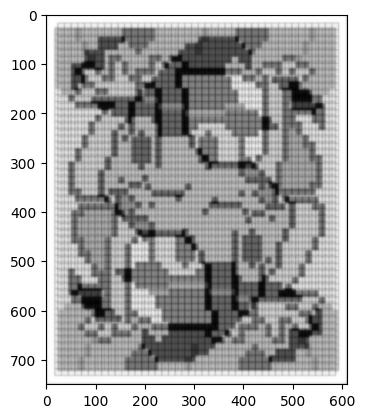

In [ ]:
G_butter = np.fft.ifftshift(G_butter)
G_butter = np.fft.ifft2(G_butter)
G_butter = np.abs(G_butter)
plt.imshow(G_butter, cmap='gray')

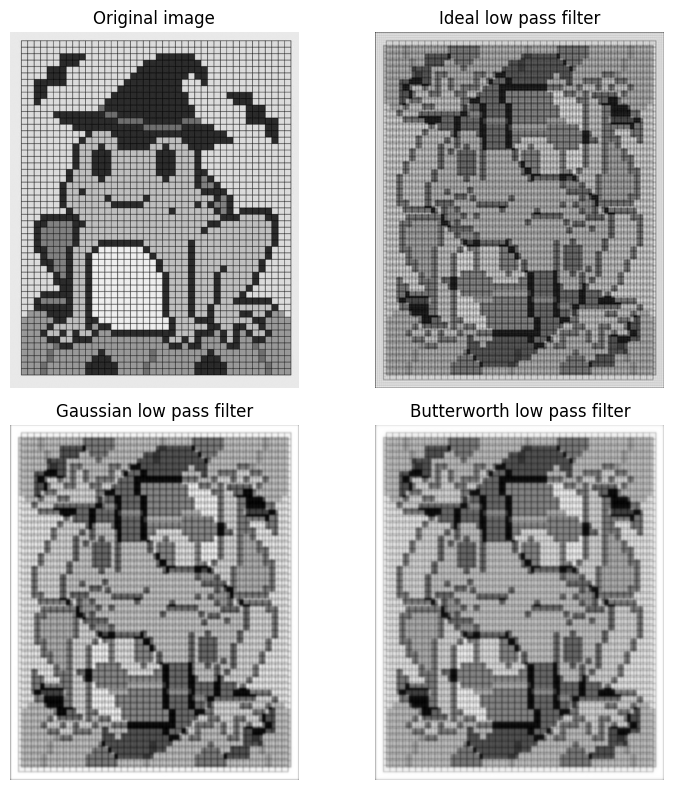

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 0].imshow(grey_img, cmap='gray')
axs[0, 0].set_title("Original image")
axs[0, 0].axis('off')

axs[0, 1].imshow(G_ideal, cmap='gray')
axs[0, 1].set_title("Ideal low pass filter")
axs[0, 1].axis('off')

axs[1, 0].imshow(G_gaussian, cmap='gray')
axs[1, 0].set_title("Gaussian low pass filter")
axs[1, 0].axis('off')

axs[1, 1].imshow(G_butter, cmap='gray')
axs[1, 1].set_title("Butterworth low pass filter")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


#### HIGH PASS FILTER

In [ ]:
G_ideal_high = np.zeros(img.shape, dtype="float")
G_gaussian_high = np.zeros(img.shape, dtype="float")
G_butter_high = np.zeros(img.shape, dtype="float")

In [ ]:
H_ideal_hp = np.zeros(img.shape, dtype="float")
H_gaussian_hp = np.zeros(img.shape, dtype="float")
H_butter_hp = np.zeros(img.shape, dtype="float")

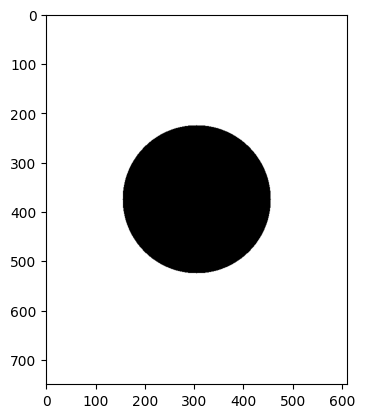

In [ ]:
for i in range(1, M):
  for j in range(1, N):
    H_ideal_hp[i, j] = 1 - H_ideal[i, j]

plt.imshow(H_ideal_hp, cmap='gray')

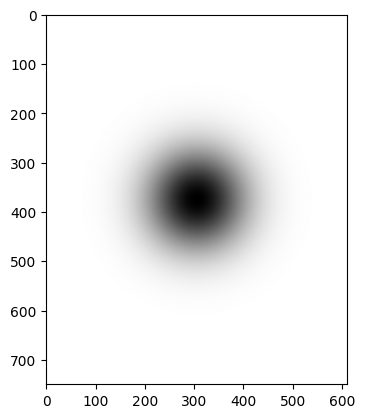

In [ ]:
for i in range(1, M):
  for j in range(1, N):
    H_gaussian_hp[i, j] = 1 - H_gaussian[i, j]

plt.imshow(H_gaussian_hp, cmap='gray')

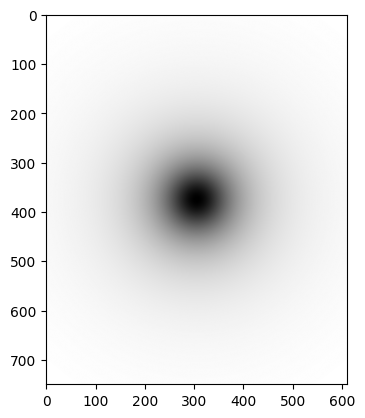

In [ ]:
for i in range(1, M):
  for j in range(1, N):
    H_butter_hp[i, j] = 1 - H_butter[i, j]

plt.imshow(H_butter_hp, cmap='gray')

In [ ]:
for u in range(1, M):
  for v in range(1, N):
    G_ideal_high[u, v] = F[u, v] * H_ideal_hp[u, v]

/tmp/ipython-input-2723261013.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  G_ideal_high[u, v] = F[u, v] * H_ideal_hp[u, v]


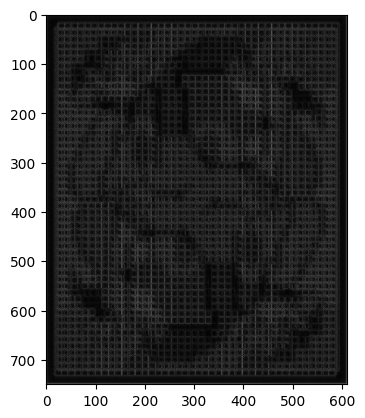

In [ ]:
G_ideal_high = np.fft.ifftshift(G_ideal_high)
G_ideal_high = np.fft.ifft2(G_ideal_high)
G_ideal_high = np.abs(G_ideal_high)
plt.imshow(G_ideal_high, cmap='gray')

In [ ]:
for u in range(1, M):
  for v in range(1, N):
    G_gaussian_high[u, v] = F[u, v] * H_gaussian_hp[u, v]

/tmp/ipython-input-2743259141.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  G_gaussian_high[u, v] = F[u, v] * H_gaussian_hp[u, v]


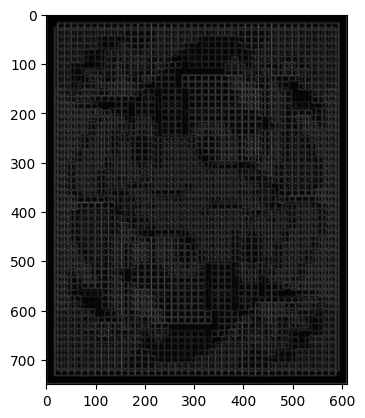

In [ ]:
G_gaussian_high = np.fft.ifftshift(G_gaussian_high)
G_gaussian_high = np.fft.ifft2(G_gaussian_high)
G_gaussian_high = np.abs(G_gaussian_high)
plt.imshow(G_gaussian_high, cmap='gray')

In [ ]:
for u in range(1, M):
  for v in range(1, N):
    G_butter_high[u, v] = F[u, v] * H_butter_hp[u, v]

/tmp/ipython-input-4180123055.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  G_butter_high[u, v] = F[u, v] * H_butter_hp[u, v]


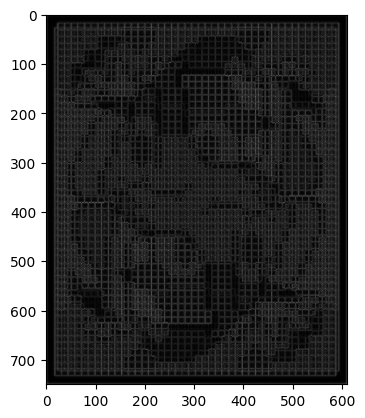

In [ ]:
G_butter_high = np.fft.ifftshift(G_butter_high)
G_butter_high = np.fft.ifft2(G_butter_high)
G_butter_high = np.abs(G_butter_high)
plt.imshow(G_butter_high, cmap='gray')

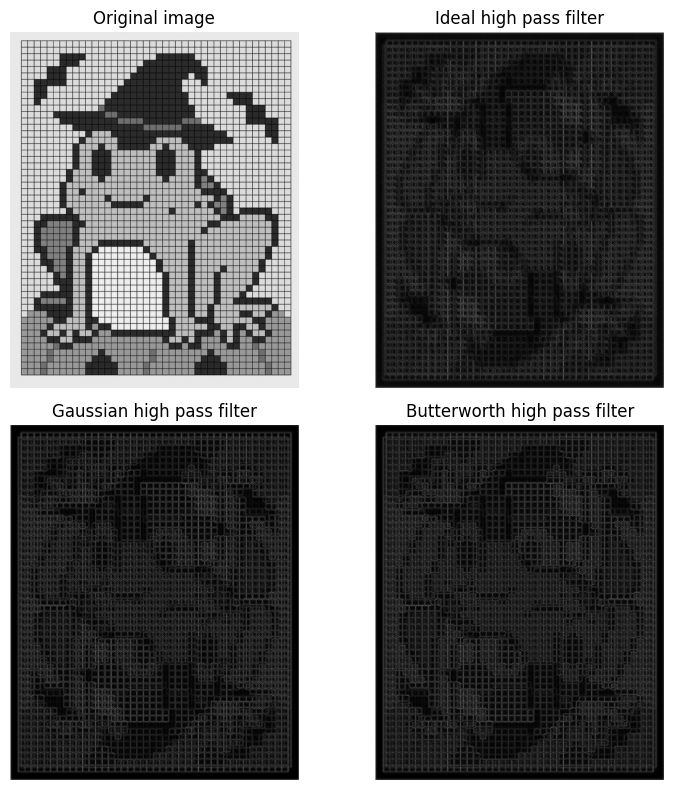

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 0].imshow(grey_img, cmap='gray')
axs[0, 0].set_title("Original image")
axs[0, 0].axis('off')

axs[0, 1].imshow(G_ideal_high, cmap='gray')
axs[0, 1].set_title("Ideal high pass filter")
axs[0, 1].axis('off')

axs[1, 0].imshow(G_gaussian_high, cmap='gray')
axs[1, 0].set_title("Gaussian high pass filter")
axs[1, 0].axis('off')

axs[1, 1].imshow(G_butter_high, cmap='gray')
axs[1, 1].set_title("Butterworth high pass filter")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()
